# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

In [2]:
# Read your api key environment variable
# YOUR CODE HERE!
load_dotenv()
api_key = os.getenv("NEWS_API_KEY")

In [3]:
# Create a newsapi client
# YOUR CODE HERE!
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=api_key)

In [5]:
# Fetch the Bitcoin news articles
# YOUR CODE HERE!
btc_articles = newsapi.get_everything(
    q="bitcoin",
    language="en",
    sort_by="relevancy"
)

In [6]:
# Fetch the Ethereum news articles
# YOUR CODE HERE!
eth_articles = newsapi.get_everything(
    q="ethereum",
    language="en",
    sort_by="relevancy"
)

In [7]:
# Create the Bitcoin sentiment scores DataFrame
# YOUR CODE HERE!
sentiments = []

for articles in btc_articles["articles"]:
    try:
        text = articles["content"]
        results = analyzer.polarity_scores(text)
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]

        sentiments.append({
            "text": text,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
        })
    except AttributeError:
        pass
    
btc  = pd.DataFrame(sentiments)
btc.head()

,text,Compound,Positive,Negative,Neutral
0,The government of India is considering an 18% ...,-0.2924,0.000,0.059,0.941
1,Just weeks after it shattered its yearslong as...,0.3612,0.171,0.080,0.749
2,New York (CNN Business)Bitcoin has been flirti...,0.5719,0.132,0.000,0.868
3,Ban reflects Twitters failure to promote healt...,-0.3818,0.135,0.176,0.689
4,The Securities and Exchange Commission plans t...,0.5267,0.136,0.000,0.864


In [8]:
# Create the ethereum sentiment scores DataFrame
# YOUR CODE HERE!
sentiments = []

for articles in eth_articles["articles"]:
    try:
        text = articles["content"]
        results = analyzer.polarity_scores(text)
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]

        sentiments.append({
            "text": text,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
        })
    except AttributeError:
        pass
    
eth = pd.DataFrame(sentiments)
eth.head()

,text,Compound,Positive,Negative,Neutral
0,The Securities and Exchange Commission plans t...,0.5267,0.136,0.000,0.864
1,Cryptocurrencies stole headlines on the first ...,0.3412,0.074,0.000,0.926
2,Bitcoin was once derided by serious investors ...,0.0772,0.066,0.085,0.849
3,NEW YORK (Reuters) - Total investor inflows in...,0.3612,0.068,0.000,0.932
4,Bitcoin fizzled in Monday trading as the famou...,-0.2732,0.000,0.060,0.940


In [9]:
# Describe the Bitcoin Sentiment
# YOUR CODE HERE!
btc.describe()

,Compound,Positive,Negative,Neutral
count,18.000000,18.000000,18.000000,18.000000
mean,0.316067,0.107944,0.031778,0.860333
std,0.365673,0.074630,0.054432,0.099789
min,-0.381800,0.000000,0.000000,0.675000
25%,0.000000,0.024250,0.000000,0.797250
50%,0.448950,0.135500,0.000000,0.858000
75%,0.611650,0.150750,0.054750,0.931500
max,0.817300,0.233000,0.176000,1.000000


In [10]:
# Describe the Ethereum Sentiment
# YOUR CODE HERE!
eth.describe()

,Compound,Positive,Negative,Neutral
count,19.000000,19.000000,19.000000,19.000000
mean,0.139879,0.045632,0.014263,0.940105
std,0.316680,0.059431,0.028800,0.060090
min,-0.381800,0.000000,0.000000,0.845000
25%,0.000000,0.000000,0.000000,0.888000
50%,0.000000,0.000000,0.000000,0.940000
75%,0.435900,0.086500,0.000000,1.000000
max,0.636900,0.155000,0.085000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin has a higher mean positive score (0.107944) than Ethereum (0.045632)

Q: Which coin had the highest compound score?

A: Ethereum has the highest compound score (19) than Bitcoin (18)

Q. Which coin had the highest positive score?

A: Ethereum has the highest positive score (19) than Bitcoin (18)

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [11]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [12]:
# Expand the default stopwords list if necessary
# YOUR CODE HERE!
wnl = WordNetLemmatizer() 
stop = stopwords.words('english')
stop.append("u")
stop.append("it'")
stop.append("'s")
stop.append("n't")
stop.append('…')
stop.append("\`")
stop.append('``')
stop.append('char')
stop.append("''")
stop = set(stop)

In [13]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Create a list of the words
    words = word_tokenize(text)
    # Convert the words to lowercase
    words = list(filter(lambda w: w.lower(), words))
    # Remove the punctuation
    words = list(filter(lambda t: t not in punctuation, words))
    # Remove the stop words
    words = list(filter(lambda t: t.lower() not in stop, words))
    # Lemmatize Words into root words
    tokens = [wnl.lemmatize(word) for word in words]
    return tokens


In [14]:
# Create a new tokens column for bitcoin
# YOUR CODE HERE!
btc["tokens"] = btc.text.apply(tokenizer)
btc.head()

,text,Compound,Positive,Negative,Neutral,tokens
0,The government of India is considering an 18% ...,-0.2924,0.000,0.059,0.941,"[government, India, considering, 18, tax, bitc..."
1,Just weeks after it shattered its yearslong as...,0.3612,0.171,0.080,0.749,"[week, shattered, yearslong, aspiration, reach..."
2,New York (CNN Business)Bitcoin has been flirti...,0.5719,0.132,0.000,0.868,"[New, York, CNN, Business, Bitcoin, flirting, ..."
3,Ban reflects Twitters failure to promote healt...,-0.3818,0.135,0.176,0.689,"[Ban, reflects, Twitters, failure, promote, he..."
4,The Securities and Exchange Commission plans t...,0.5267,0.136,0.000,0.864,"[Securities, Exchange, Commission, plan, sue, ..."


In [15]:
# Create a new tokens column for ethereum
# YOUR CODE HERE!
eth["tokens"] = eth.text.apply(tokenizer)
eth.head()

,text,Compound,Positive,Negative,Neutral,tokens
0,The Securities and Exchange Commission plans t...,0.5267,0.136,0.000,0.864,"[Securities, Exchange, Commission, plan, sue, ..."
1,Cryptocurrencies stole headlines on the first ...,0.3412,0.074,0.000,0.926,"[Cryptocurrencies, stole, headline, first, sto..."
2,Bitcoin was once derided by serious investors ...,0.0772,0.066,0.085,0.849,"[Bitcoin, derided, serious, investor, bubble, ..."
3,NEW YORK (Reuters) - Total investor inflows in...,0.3612,0.068,0.000,0.932,"[NEW, YORK, Reuters, Total, investor, inflow, ..."
4,Bitcoin fizzled in Monday trading as the famou...,-0.2732,0.000,0.060,0.940,"[Bitcoin, fizzled, Monday, trading, famously, ..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [16]:
from collections import Counter
from nltk import ngrams

In [17]:
# Generate the Bitcoin N-grams where N=2
# YOUR CODE HERE!
N = 2
grams = ngrams(tokenizer(btc.text.str.cat()), N)
Counter(grams).most_common(20)

[(('Reuters', 'Bitcoin'), 5),
 (('popular', 'cryptocurrency'), 4),
 (('Bitcoin', 'Wednesday'), 4),
 (('Wednesday', 'hit'), 4),
 (('hit', 'record'), 3),
 (('record', '28,599.99'), 3),
 (('28,599.99', 'taking'), 3),
 (('taking', 'gain'), 3),
 (('gain', 'year'), 3),
 (('year', 'past'), 3),
 (('past', '295'), 3),
 (('world', 'popular'), 3),
 (('char', 'Posted'), 3),
 (('virtual', 'currency'), 2),
 (('Jack', 'Dorsey'), 2),
 (('char', 'Reuters'), 2),
 (('Reuters', 'Staff'), 2),
 (('Staff', 'LONDON'), 2),
 (('LONDON', 'Dec'), 2),
 (('Dec', '30'), 2)]

In [18]:
# Generate the Ethereum N-grams where N=2
# YOUR CODE HERE!
N = 2
grams = ngrams(tokenizer(eth.text.str.cat()), N)
Counter(grams).most_common(20)

[(('virtual', 'currency'), 7),
 (('FILE', 'PHOTO'), 6),
 (('illustration', 'taken'), 6),
 (('char', 'Reuters'), 5),
 (('Reuters', 'Staff'), 5),
 (('Staff', 'FILE'), 5),
 (('PHOTO', 'representation'), 5),
 (('representation', 'virtual'), 5),
 (('2020', 'REUTERS/Dado'), 4),
 (('Reuters', 'Bitcoin'), 4),
 (('currency', 'Bitcoin'), 4),
 (('seen', 'illustration'), 3),
 (('taken', 'November'), 3),
 (('November', '19'), 3),
 (('19', '2020'), 3),
 (('REUTERS/Dado', 'Ruvic/Illustration'), 3),
 (('REUTERS/Dado', 'Ruvic'), 3),
 (('LONDON', 'Reuters'), 3),
 (('char', 'Bitcoin'), 2),
 (('char', 'NEW'), 2)]

In [19]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [20]:
# Get the top 10 words for Bitcoin
# YOUR CODE HERE!
all_tokens = tokenizer(btc.text.str.cat())
token_count(all_tokens, 10)

[('char', 18),
 ('Bitcoin', 13),
 ('Reuters', 9),
 ('cryptocurrency', 7),
 ('record', 6),
 ('year', 5),
 ('LONDON', 5),
 ('investor', 5),
 ('currency', 4),
 ('popular', 4)]

In [21]:
# Get the top 10 words for Ethereum
# YOUR CODE HERE!
all_tokens = tokenizer(eth.text.str.cat())
token_count(all_tokens, 10)

[('char', 19),
 ('Reuters', 12),
 ('Bitcoin', 11),
 ('currency', 10),
 ('cryptocurrency', 7),
 ('virtual', 7),
 ('taken', 7),
 ('2020', 7),
 ('bitcoin', 6),
 ('FILE', 6)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [27]:
# Generate the Bitcoin word cloud
# YOUR CODE HERE!
def wordcloud(text, title=""):
    df_cloud = WordCloud(width=600).generate(text)
    plt.imshow(df_cloud)
    plt.axis("off")
    plt.title(title, fontsize=32, fontweight="bold")
    plt.show()

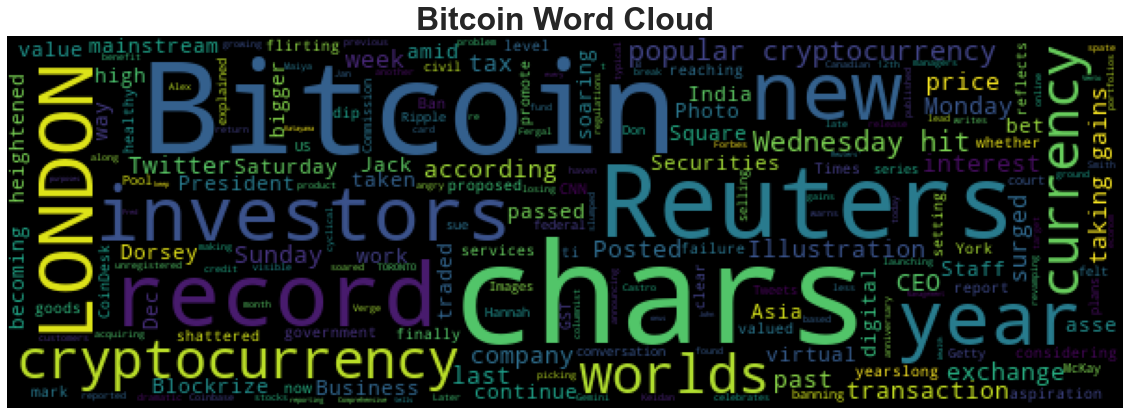

In [28]:
wordcloud(btc.text.str.cat(), title="Bitcoin Word Cloud")

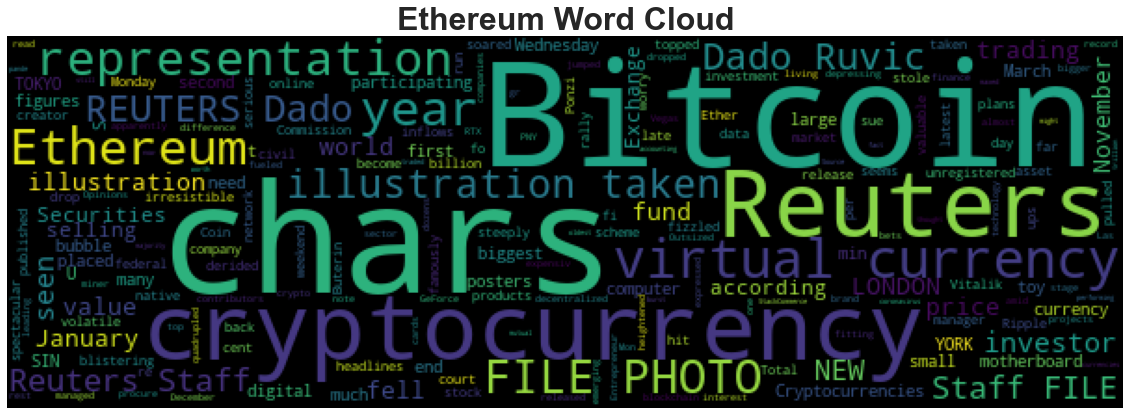

In [29]:
# Generate the Ethereum word cloud
# YOUR CODE HERE!
wordcloud(eth.text.str.cat(), title="Ethereum Word Cloud")

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [32]:
import spacy
from spacy import displacy

In [28]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [33]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [34]:
# Concatenate all of the bitcoin text together
# YOUR CODE HERE!
btc_text = btc.text.str.cat()
btc_text

"The government of India is considering an 18% tax on all bitcoin transactions, according to a new report from the Times of India. Its not clear whether the proposed goods and services tax (GST) would… [+1397 chars]Just weeks after it shattered its yearslong aspiration of reaching $20,000 in value, Bitcoin is at it again. On Saturday, the cryptocurrency passed $33,000 in value, according to CoinDesk, before dip… [+2123 chars]New York (CNN Business)Bitcoin has been flirting with the $30,000 mark for weeks, and finally passed that record-setting level Saturday. The virtual currency is now valued at above $33,000, an all-ti… [+2108 chars]Ban reflects Twitters failure to promote healthy conversation\r\nPhoto by Hannah McKay-Pool/Getty Images\r\nTwitter CEO Jack Dorsey, in a series of Tweets, explained that he felt banning US President Don… [+3185 chars]The Securities and Exchange Commission plans to sue Ripple in federal civil court for selling unregistered securities, according to a news 

In [43]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
doc = nlp(btc_text)


# Add a title to the document
# YOUR CODE HERE!
doc.user_data["title"] = "BTC NER"

In [44]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(doc, style='ent', jupyter=True)

In [38]:
# List all Entities
# YOUR CODE HERE!
for ent in doc.ents:
    print(ent.text, ent.label_)

India GPE
18% PERCENT
bitcoin GPE
the Times of India ORG
20,000 MONEY
Bitcoin GPE
Saturday DATE
33,000 MONEY
CoinDesk PERSON
CNN ORG
$30,000 mark MONEY
weeks DATE
Saturday DATE
above $33,000 MONEY
Hannah McKay-Pool/Getty PERSON
Twitter ORG
Jack Dorsey PERSON
Tweets GPE
US GPE
Don PERSON
chars]The Securities and Exchange Commission ORG
Gemini PERSON
Blockrize WORK_OF_ART
today DATE
Blockrizes GPE
Later this year DATE
bitcoin GPE
the popular cryptocurrency exchange ORG
Sunday DATE
Bitcoin GPE
50% PERCENT
the previous month DATE
the week DATE
24.8% PERCENT
Bitcoin GPE
12th ORDINAL
Forbes ORG
Fergal Smith PERSON
Maiya Keidan PERSON
Reuters ORG
Canadian NORP
Reuters ORG
LONDON GPE
Dec 30 DATE
Reuters ORG
Bitcoin GPE
Wednesday DATE
a record $28,599.99 MONEY
this year DATE
295% PERCENT
3.5% PERCENT
28,349 MONEY
Alex Castro PERSON
The Verge ORG
Jack Dorsey PERSON
Twitter and Square ORG
Reuters ORG
LONDON GPE
Jan 4 DATE
Reuters ORG
Bitcoin GPE
14% PERCENT
27,805 MONEY
Monday DATE
the new year D

---

## Ethereum NER

In [39]:
# Concatenate all of the bitcoin text together
# YOUR CODE HERE!
eth_text = eth.text.str.cat()
eth_text

"The Securities and Exchange Commission plans to sue Ripple in federal civil court for selling unregistered securities, according to a news release published online by the cryptocurrency company late … [+2950 chars]Cryptocurrencies stole headlines on the first stock-market trading day of 2021, with bitcoin and ethereum selling off steeply after blistering run-ups over the weekend.\r\nBut investors need not worry … [+2877 chars]Bitcoin was once derided by serious investors as a bubble or a Ponzi scheme. But this year, it has become an irresistible investment for many of them.\xa0\r\nJust this Wednesday, bitcoin topped $20,000 fo… [+5208 chars]NEW YORK (Reuters) - Total investor inflows into cryptocurrency funds and products hit $5.6 billion so far this year, up more than 600% from 2019, according to the latest data from asset manager Coin… [+2077 chars]Bitcoin fizzled in Monday trading as the famously volatile cryptocurrency pulled back after a spectacular new-year rally.\r\nPrices fell

In [41]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
eth_doc = nlp(eth_text)

# Add a title to the document
# YOUR CODE HERE!
eth_doc.user_data["title"] = "ETH NER"

In [42]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(eth_doc, style='ent', jupyter=True)

In [45]:
# List all Entities
# YOUR CODE HERE!
for ent in eth_doc.ents:
    print(ent.text, ent.label_)

The Securities and Exchange Commission ORG
first ORDINAL
day of 2021 DATE
bitcoin GPE
the weekend DATE
chars]Bitcoin DATE
this year DATE
Wednesday DATE
bitcoin GPE
20,000 MONEY
YORK PERSON
Reuters ORG
$5.6 billion MONEY
this year DATE
more than 600% PERCENT
2019 DATE
Coin ORG
Monday DATE
new-year DATE
as much as 17 CARDINAL
March DATE
Vitalik Buterin PERSON
14 CARDINAL
11 CARDINAL
Ethereum ORG
second ORDINAL
above $1,000 MONEY
Reuters ORG
November 19, 2020 DATE
REUTERS/Dado Ruvic/Illustration ORG
Reuters ORG
Bitcoin GPE
Reuters ORG
November 19, 2020 DATE
REUTERS/Dado Ruvic/Illustration ORG
Reuters ORG
Bitcoin GPE
Reuters ORG
Bitcoin GPE
January 7, 2021 DATE
REUTERS ORG
Dado Ruvic PERSON
SIN ORG
Reuters ORG
Bitcoin GPE
January 7, 2021 DATE
REUTERS ORG
Dado Ruvic PERSON
SIN ORG
2020 DATE
Las Vegas GPE
dozens CARDINAL
3080 CARDINAL
second ORDINAL
December 2020 DATE
first ORDINAL
Ethereum 2.0 ORG
9, 2021 DATE
7 min QUANTITY
2020 DATE
the year DATE
Bitcoin GPE
November 19, 2020 DATE
REUTERS